In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rosbag
import pymap3d as pm

from scipy.signal import savgol_filter
%matplotlib inline

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
def wrap_angle(angle):
    return (angle + np.pi) % (2 * np.pi) - np.pi

def to_euler(x, y, z, w):
    """Return as xyz (roll pitch yaw) Euler angles."""
    roll = np.arctan2(2 * (w * x + y * z), 1 - 2 * (x**2 + y**2))
    pitch = np.arcsin(2 * (w * y - z * x))
    yaw = np.arctan2(2 * (w * z + x * y), 1 - 2 * (y**2 + z**2))
    return np.array([roll, pitch, yaw])

In [3]:
ls

 arduino-arduinoide.desktop*   kf_gps/
'generate waypoints'/          quaternion_to_rpy/
 Keganjalan_1.png             'Screenshot at 2020-08-17 23-15-38.png'
 Keganjalan_2.png              test_control_gps_2020-08-18-19-38-42.bag
'keganjalan 3.png'             test_control_gps.ipynb
'keganjalan 4.png'             waypoints.ipynb


In [4]:
bag = rosbag.Bag('test_control_gps_2020-08-18-19-38-42.bag')

# GPS Data

In [5]:
lat0, lon0, h0 = -6.8712, 107.5738, 768
gps_t = []
gps_pos = []
gps_cov = []
for topic, msg, _ in bag.read_messages(topics=['/fix']):
    gps_t.append(msg.header.stamp.to_sec())
    gps_pos.append(pm.geodetic2enu(msg.latitude, msg.longitude, msg.altitude, lat0, lon0, h0))
    gps_cov.append(msg.position_covariance)
gps_t = np.array(gps_t)
gps_pos = np.array(gps_pos)
gps_cov = np.array(gps_cov).reshape(-1,3,3)

# Ambil yang bagus-bagus aja
gnss_pos = np.copy(gps_pos[:-1])
gnss_t = np.copy(gps_t[:-1])
gnss_cov = np.copy(gps_cov[:-1])

In [6]:
gps_pos = (-1) * np.copy(gnss_pos[:,:2])
gps_t = np.copy(gnss_t)

# GPS State Estimation Data

In [7]:
gse_t = []
gse_x = []
gse_y = []
gse_vx = []
gse_vy = []
gse_yaw = []
for topic, msg, _ in bag.read_messages(topics=['/gps_state_estimation']):
    gse_t.append(msg.header.stamp.to_sec())
    gse_x.append(msg.x)
    gse_y.append(msg.y)
    gse_vx.append(msg.vx)
    gse_vy.append(msg.vy)
    gse_yaw.append(msg.yaw)
gse_t = np.array(gse_t)
gse_x = np.array(gse_x)
gse_y = np.array(gse_y)
gse_vx = np.array(gse_vx)
gse_vy = np.array(gse_vy)
gse_yaw = np.array(gse_yaw)

# Control Data

In [23]:
cs_t = []
cs_action_steer = []
cs_action_throttle = []
cs_action_brake = []
cs_error_lateral = []
cs_error_yaw = []
cs_error_speed = []
cs_actual_x = []
cs_actual_y = []
cs_actual_yaw = []
cs_actual_speed = []
cs_wp_idx = []
cs_ref_x = []
cs_ref_y = []
cs_ref_yaw = []
cs_ref_speed = []
cs_ref_curvature = []

for topic, msg, _ in bag.read_messages(topics=['/control_signal']):
    cs_t.append(msg.header.stamp.to_sec())
    cs_action_steer.append(msg.action_steer)
    cs_action_throttle.append(msg.action_throttle)
    cs_action_brake.append(msg.action_brake)
    cs_error_lateral.append(msg.error_lateral)
    cs_error_yaw.append(msg.error_yaw)
    cs_error_speed.append(msg.error_speed)
    cs_actual_x.append(msg.actual_x)
    cs_actual_y.append(msg.actual_y)
    cs_actual_yaw.append(msg.actual_yaw)
    cs_actual_speed.append(msg.actual_speed)
    cs_wp_idx.append(msg.wp_idx)
    cs_ref_x.append(msg.ref_x)
    cs_ref_y.append(msg.ref_y)
    cs_ref_yaw.append(msg.ref_yaw)
    cs_ref_speed.append(msg.ref_speed)
    cs_ref_curvature.append(msg.ref_curvature)

cs_t = np.array(cs_t)
cs_action_steer = np.array(cs_action_steer)
cs_action_throttle = np.array(cs_action_throttle)
cs_action_brake = np.array(cs_action_brake)
cs_error_lateral = np.array(cs_error_lateral)
cs_error_yaw = np.array(cs_error_yaw)
cs_error_speed = np.array(cs_error_speed)
cs_actual_x = np.array(cs_actual_x)
cs_actual_y = np.array(cs_actual_y)
cs_actual_yaw = np.array(cs_actual_yaw)
cs_actual_speed = np.array(cs_actual_speed)
cs_wp_idx = np.array(cs_wp_idx)
cs_ref_x = np.array(cs_ref_x)
cs_ref_y = np.array(cs_ref_y)
cs_ref_yaw = np.array(cs_ref_yaw)
cs_ref_speed = np.array(cs_ref_speed)
cs_ref_curvature = np.array(cs_ref_curvature)

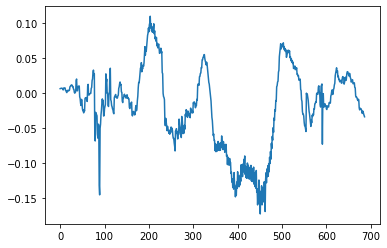

In [24]:
plt.plot(cs_error_lateral)

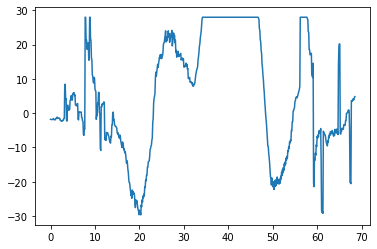

In [27]:
lim = [0, -1]
plt.plot(cs_t[lim[0]:lim[1]] - cs_t[0], cs_action_steer[lim[0]:lim[1]])

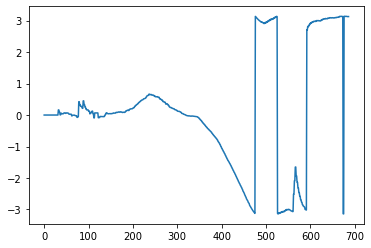

In [29]:
plt.plot(cs_actual_yaw)